<a href="https://colab.research.google.com/github/Uma1709/Healthcare_Analytics/blob/main/Diabetes_Detection_Model(Healthcare_Assignment_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn. preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare/Healthcare-Diabetes.csv')
df

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
3                        0.167   21        0  
4                        2.288   33        1  
...                        ...  ...      ...  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0  

[2768 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
df.describe()

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
25%       0.000000    27.300000                  0.244000    24.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [ ]:
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
print('Shape :',df.shape)
print('Size :',df.size)

Shape : (2768, 10)
Size : 27680


In [ ]:
df.columns


Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.rename(columns = {'Outcome' : 'Diabetic'}, inplace = True)
df.head(5)

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Diabetic  
0                     0.627   50         1  
1                     0.351   31         0  
2                     0.672   32         1  
3                     0.167   21         0  
4                     2.288   33         1

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Id', 'Pregnancies'], ['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Id', 'Pregnancies', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Id', 'Glucose', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Id', 'BloodPressure', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['Id', 'SkinThickness', None], **{})
chart

In [ ]:
df.agg({
    'Pregnancies' : 'median',
    'Glucose' : 'median',
    'BloodPressure' : 'median',
    'SkinThickness' : 'median',
    'Insulin' : 'median',
    'BMI' : 'median',
    'DiabetesPedigreeFunction' : 'median',
    'Age' : 'median'
    })

Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                23.000
Insulin                      37.000
BMI                          32.200
DiabetesPedigreeFunction      0.375
Age                          29.000
dtype: float64

#Checking the distribution of the data for individual variables

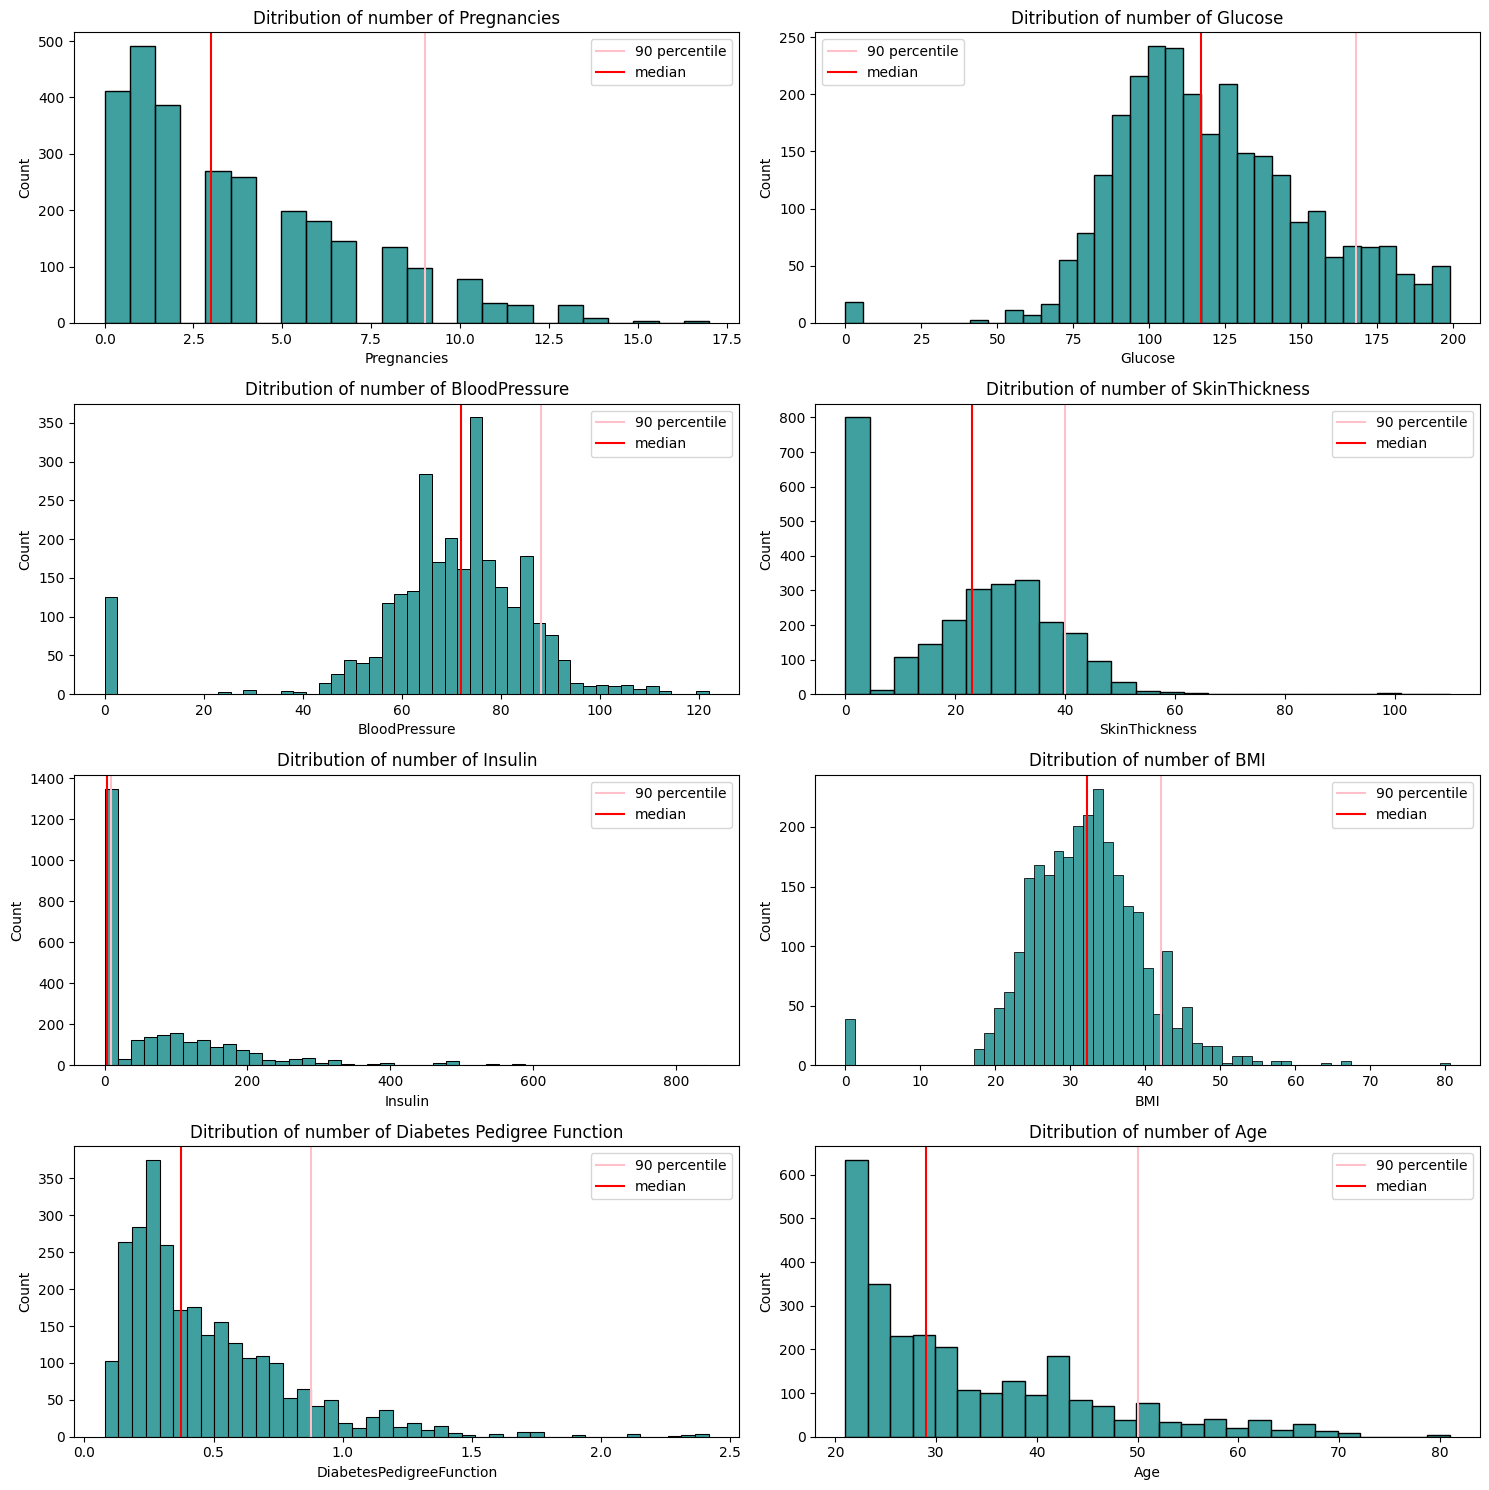

In [ ]:
fig, axes = plt.subplots(4,2, figsize = (15,15))
sns.histplot(df['Pregnancies'], ax = axes[0,0], color = 'teal')
axes[0,0].set_title('Ditribution of number of Pregnancies')
axes[0,0].axvline(df['Pregnancies'].quantile(.90), color = 'pink', label = '90 percentile')
axes[0,0].axvline(df['Pregnancies'].quantile(.50), color = 'red', label = 'median')
axes[0,0].legend()

sns.histplot(df['Glucose'], ax = axes[0,1],color = 'teal')
axes[0,1].set_title('Ditribution of number of Glucose')
axes[0,1].axvline(df['Glucose'].quantile(.90), color = 'pink', label = '90 percentile')
axes[0,1].axvline(df['Glucose'].quantile(.50), color = 'red', label = 'median')
axes[0,1].legend()

sns.histplot(df['BloodPressure'], ax = axes[1,0], color = 'teal')
axes[1,0].set_title('Ditribution of number of BloodPressure')
axes[1,0].axvline(df['BloodPressure'].quantile(.90), color = 'pink', label = '90 percentile')
axes[1,0].axvline(df['BloodPressure'].quantile(.50), color = 'red', label = 'median')
axes[1,0].legend()

sns.histplot(df['SkinThickness'], ax = axes[1,1], color = 'teal')
axes[1,1].set_title('Ditribution of number of SkinThickness')
axes[1,1].axvline(df['SkinThickness'].quantile(.90), color = 'pink', label = '90 percentile')
axes[1,1].axvline(df['SkinThickness'].quantile(.50), color = 'red', label = 'median')
axes[1,1].legend()

sns.histplot(df['Insulin'], ax = axes[2,0], color = 'teal')
axes[2,0].set_title('Ditribution of number of Insulin')
axes[2,0].axvline(df['Pregnancies'].quantile(.90), color = 'pink', label = '90 percentile')
axes[2,0].axvline(df['Pregnancies'].quantile(.50), color = 'red', label = 'median')
axes[2,0].legend()

sns.histplot(df['BMI'], ax = axes[2,1], color = 'teal')
axes[2,1].set_title('Ditribution of number of BMI')
axes[2,1].axvline(df['BMI'].quantile(.90), color = 'pink', label = '90 percentile')
axes[2,1].axvline(df['BMI'].quantile(.50), color = 'red', label = 'median')
axes[2,1].legend()

sns.histplot(df['DiabetesPedigreeFunction'], ax = axes[3,0], color = 'teal')
axes[3,0].set_title('Ditribution of number of Diabetes Pedigree Function')
axes[3,0].axvline(df['DiabetesPedigreeFunction'].quantile(.90), color = 'pink', label = '90 percentile')
axes[3,0].axvline(df['DiabetesPedigreeFunction'].quantile(.50), color = 'red', label = 'median')
axes[3,0].legend()

sns.histplot(df['Age'], ax = axes[3,1], color = 'teal')
axes[3,1].set_title('Ditribution of number of Age')
axes[3,1].axvline(df['Age'].quantile(.90), color = 'pink', label = '90 percentile')
axes[3,1].axvline(df['Age'].quantile(.50), color = 'red', label = 'median')
axes[3,1].legend()

plt.tight_layout()

#Checking outliers for existence

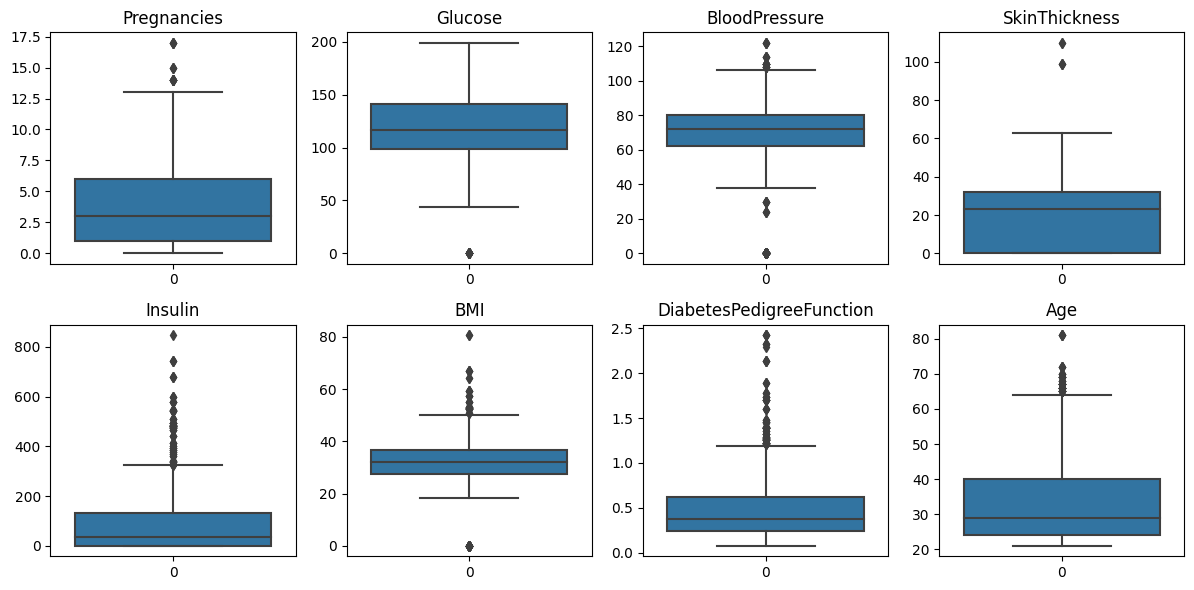

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (12,6))

sns.boxplot(df['Pregnancies'], ax = axes[0,0])
axes[0,0].set_title('Pregnancies')

sns.boxplot(df['Glucose'], ax = axes[0,1])
axes[0,1].set_title('Glucose')

sns.boxplot(df['BloodPressure'], ax = axes[0,2])
axes[0,2].set_title('BloodPressure')

sns.boxplot(df['SkinThickness'], ax = axes[0,3])
axes[0,3].set_title('SkinThickness')

sns.boxplot(df['Insulin'], ax = axes[1,0])
axes[1,0].set_title('Insulin')

sns.boxplot(df['BMI'], ax = axes[1,1])
axes[1,1].set_title('BMI')

sns.boxplot(df['DiabetesPedigreeFunction'], ax = axes[1,2])
axes[1,2].set_title('DiabetesPedigreeFunction')

sns.boxplot(df['Age'], ax = axes[1,3])
axes[1,3].set_title('Age')

plt.tight_layout()

In [ ]:
#  remove the outlier present below the lower quartile.
q1 = df['Glucose'].quantile(.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3-q1

lower_quartile = q1 - (iqr * 1.5)
lower_array = np.where(df['Glucose']<=lower_quartile)[0]

df.drop(index=lower_array).reset_index(inplace = True)

df.shape

(2768, 10)

In [ ]:
q1 = df['BloodPressure'].quantile(.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3-q1

lower_quartile = q1 - (iqr * 1.5)

lower_array = np.where(df['BloodPressure'] <= lower_quartile)[0]

df.drop(index=lower_array).reset_index(inplace = True)

df.shape

(2768, 10)

In [ ]:
round(df['Diabetic'].value_counts(normalize = True)*100,2)


0    65.61
1    34.39
Name: Diabetic, dtype: float64

#Checking whether the extreme values are more prone to diabetes.

In [ ]:
diabetic = df[df['Age'] > np.percentile(df['Age'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True)*100,2)

0    55.43
1    44.57
Name: Diabetic, dtype: float64

In [ ]:
diabetic = df[df['Pregnancies'] > np.percentile(df['Pregnancies'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    53.0
0    47.0
Name: Diabetic, dtype: float64

In [ ]:
diabetic = df[df['DiabetesPedigreeFunction'] > np.percentile(df['DiabetesPedigreeFunction'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    51.0
0    49.0
Name: Diabetic, dtype: float64

# Using a scatterplot to determine the relationship among different variables.

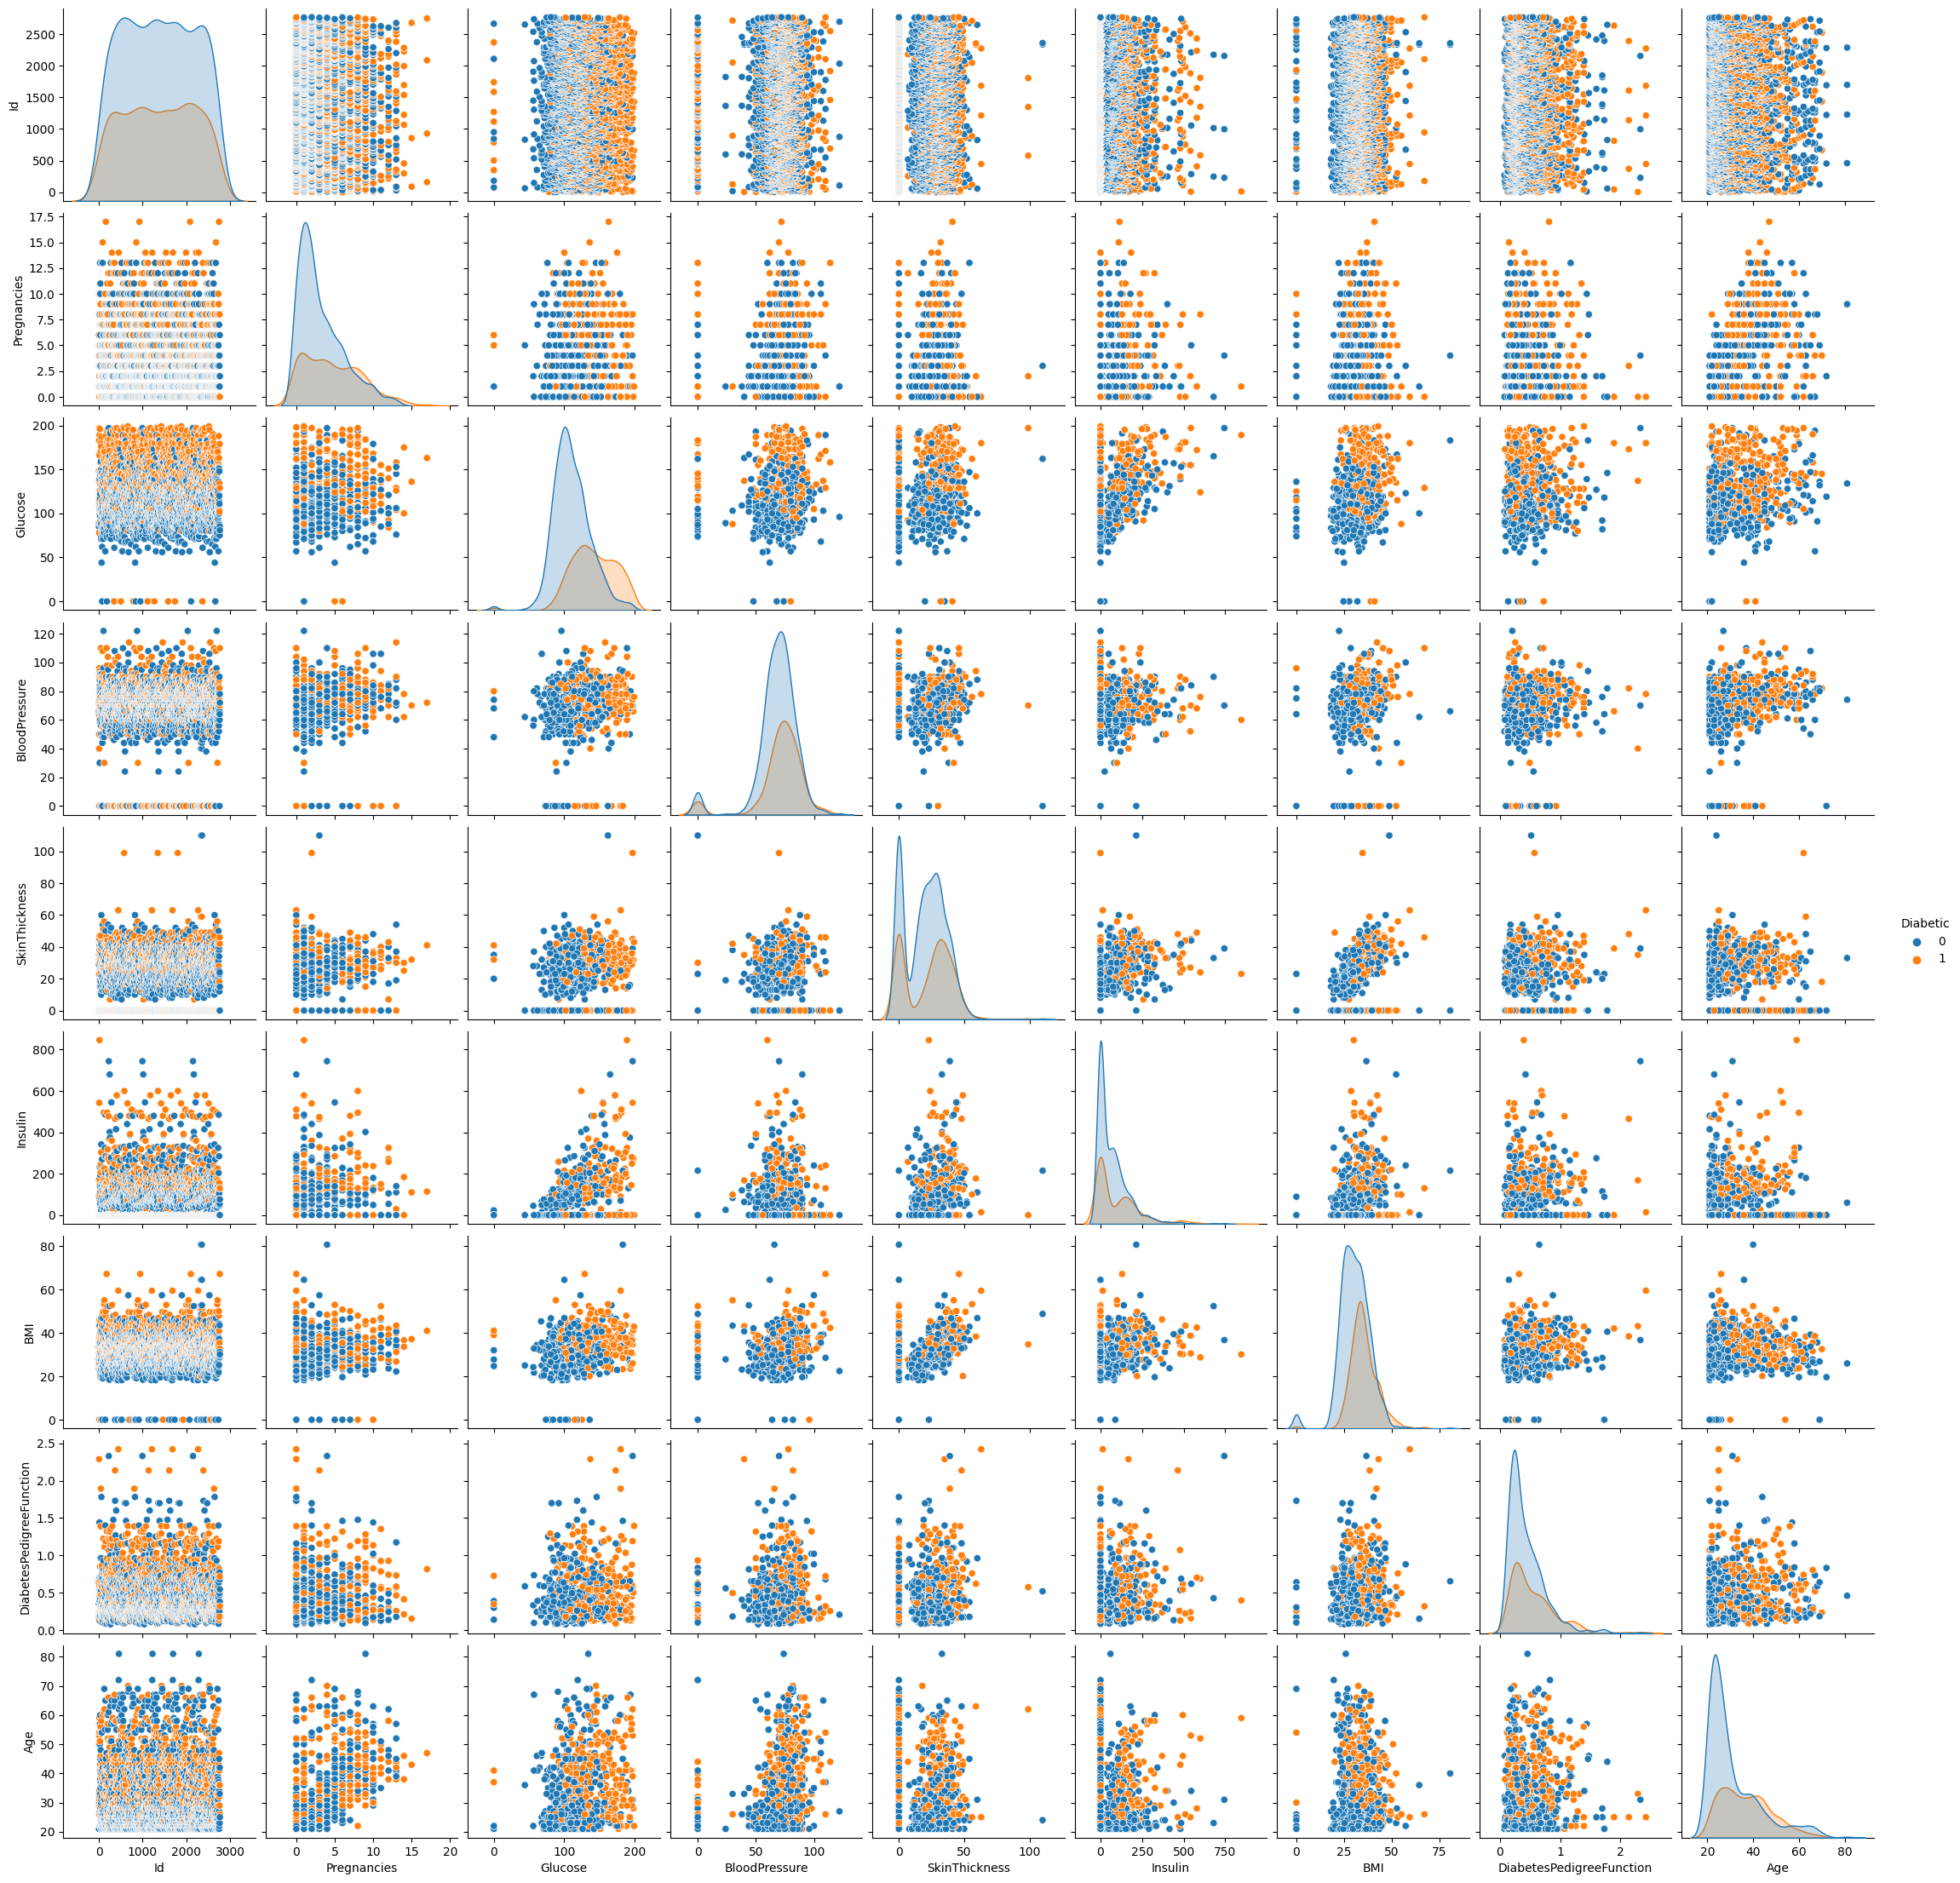

In [ ]:
sns.pairplot(df, hue = 'Diabetic')

<Axes: >

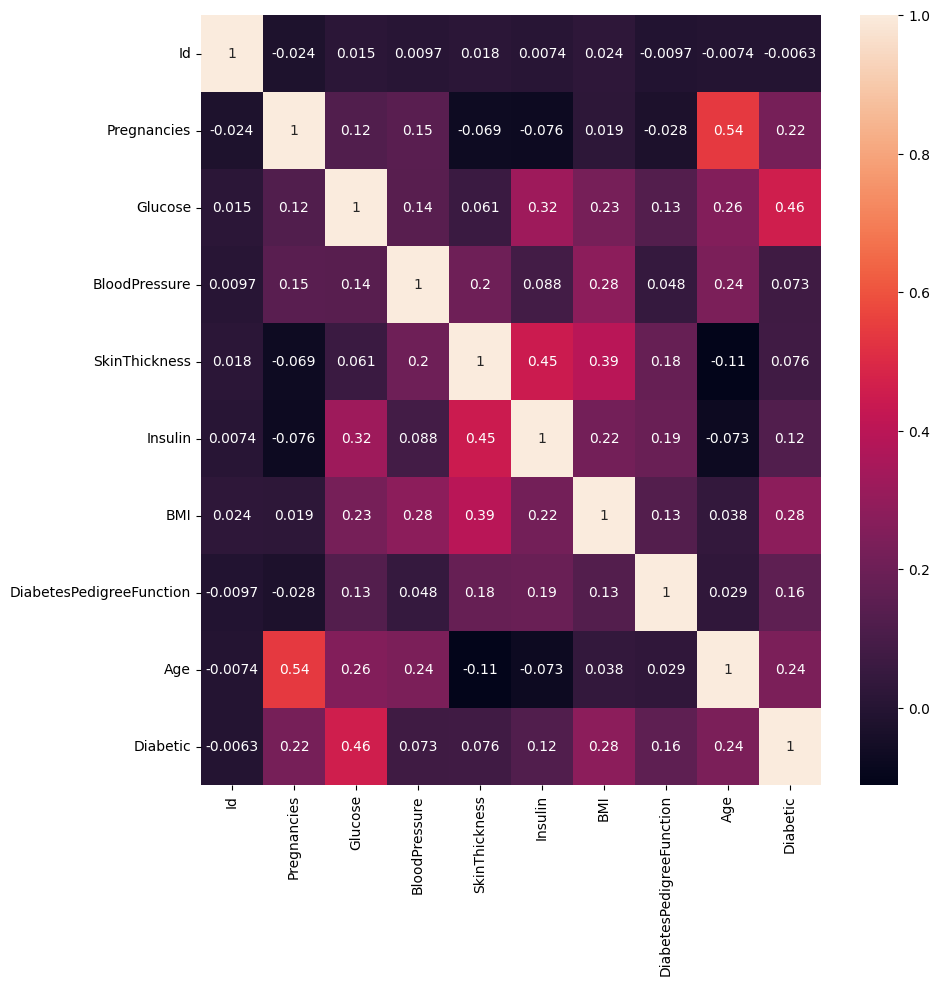

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

#Removing the irrelevant variables from the dataset.

In [ ]:
df = df.drop(['Id','BloodPressure', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction'], axis = 1)
df.head()

Pregnancies  Glucose   BMI  Age  Diabetic
0            6      148  33.6   50         1
1            1       85  26.6   31         0
2            8      183  23.3   32         1
3            1       89  28.1   21         0
4            0      137  43.1   33         1

#Naive bayes


In [ ]:
# defining predictor variable
y = df['Diabetic']
y


0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Diabetic, Length: 2768, dtype: int64

In [ ]:
# defining target variable

x = df.copy()
x = x.drop(columns = [ 'Diabetic' ])
x.head()

Pregnancies  Glucose   BMI  Age
0            6      148  33.6   50
1            1       85  26.6   31
2            8      183  23.3   32
3            1       89  28.1   21
4            0      137  43.1   33

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 0)
print(f" x train: {x_train.shape} \n x test:  {x_test.shape} \n y train: {y_train.shape} \n y test:  {y_test.shape}")

 x train: (2214, 4) 
 x test:  (554, 4) 
 y train: (2214,) 
 y test:  (554,)


In [ ]:
nb = BernoulliNB(binarize=0.0)
model = nb.fit(x_train, y_train)
model

BernoulliNB()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"Precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"F1 Score: {round(f1_score(y_test, y_pred),3)}")

Accuracy: 0.652
Precision: 0.333
recall: 0.01
F1 Score: 0.02


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       363
           1       0.33      0.01      0.02       191

    accuracy                           0.65       554
   macro avg       0.49      0.50      0.40       554
weighted avg       0.54      0.65      0.52       554



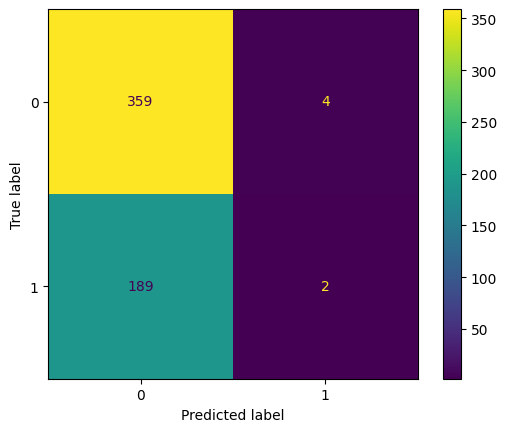

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb.classes_)
disp.plot()

#Random Forest Model

In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, stratify = y_train, random_state = 0, test_size = 0.20)
# defining the hyperparamters
cv_params = {
    'max_depth' : [8,10,14,20],
    'n_estimators' : [20, 40, 60, 80, 100],
    'min_samples_leaf' : [0.25, 0.5, 1],
    'min_samples_split' : [0.001, 0.01, 0.05],
    'max_features' : ['sqrt'],
    'max_samples' : [.5, .9]
}
split_index = [0 if x in x_val.index else -1 for x in x_train.index]
custom_split = PredefinedSplit(split_index)
clf = RandomForestClassifier(random_state = 0)
rf = GridSearchCV(clf, cv_params, cv = custom_split, refit = 'f1', n_jobs = -1, verbose = 1)
rf.fit(x_train, y_train)

Fitting 1 folds for each of 360 candidates, totalling 360 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 14, 20], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.25, 0.5, 1],
                         'min_samples_split': [0.001, 0.01, 0.05],
                         'n_estimators': [20, 40, 60, 80, 100]},
             refit='f1', verbose=1)

In [ ]:
rf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 80}

In [ ]:
# using optimal paramters for grid search cross validation
rf_op = RandomForestClassifier(n_estimators = 20, max_depth = 20, max_features = 'sqrt', max_samples = 0.9, min_samples_leaf = 1,
                              min_samples_split = 0.001, random_state = 0)

In [ ]:
rf_op.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=20, random_state=0)

In [ ]:
y_pred = rf_op.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [ ]:
print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"Precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"F1 Score: {round(f1_score(y_test, y_pred),3)}")

Accuracy: 0.991
Precision: 0.984
recall: 0.99
F1 Score: 0.987


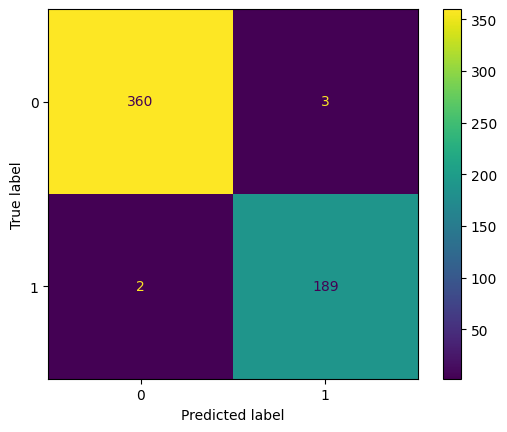

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_op.classes_)

disp.plot()

#conclusion
Accuracy: 0.991, indicating a high overall correctness in its predictions.
Precision: 0.984, demonstrating a high ability to correctly identify positive cases without many false positives.
Recall: 0.99, highlighting the model's capability to capture a significant portion of true positive cases.
F1 Score: 0.987, representing a balanced measure that combines precision and recall effectively.
These results suggest that the model is robust and proficient in its task, achieving a high degree of accuracy and precision while maintaining a respectable recall rate.